In [45]:
from topography import Create_Initial_Topography, multi_valley, order_distribution
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def draw_3d_CA(H,h,mode,size):
    """makes a 3D plot of the Cellular Automata system state"""

    # Create a meshgrid for x, y coordinates
    x, y = np.meshgrid(np.arange(H.shape[1]), np.arange(H.shape[0]))

    # Flatten the arrays to create bars in the 3D plot
    x = x.flatten()
    y = y.flatten()
    z = np.zeros_like(x)

    z = H.flatten()
    dx = dy = 0.8
    dz = H.flatten()
    dz2 = h.flatten()

    #create figure
    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(111, projection='3d')
    ax.grid(False)
    ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

    plt.axis('off')

    nonzero_indices = dz > 0
    nonzero_indices2 = dz2 > 0

    # Ice
    ax.bar3d(x[nonzero_indices], y[nonzero_indices], z[nonzero_indices],
             dx, dy, dz[nonzero_indices] + .38, color='linen', shade=True, alpha=1)  # +.3 azure, seashell,linen
    # Water
    ax.bar3d(x[nonzero_indices2], y[nonzero_indices2], dz[nonzero_indices] + .4,
             dx, dy, dz2[nonzero_indices2], color='steelblue', shade=True, alpha=.4)

    ax.view_init(elev=30, azim=360 - 37)
    # ax.view_init(elev=70, azim=360-60)
    plt.gca().invert_xaxis()

    plt.savefig(f"Figures/Topography/3D/Topography_{mode}_size_{size}.png")

def draw_2D_CA(H,mode,size):

    #create figure
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    #hide ticks
    ax.set_xticks([])
    ax.set_yticks([])

    #image is initial state
    im = ax.imshow(H,cmap="bone")

    #add colorbar to the right
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)

    fig.colorbar(im, cax=cax, orientation='vertical')

    plt.savefig(f"Figures/Topography/2D/Topography_{mode}_size_{size}.png")


# Visualize the initial topographies in 2D and 3D

/home/maistro/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/maistro/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


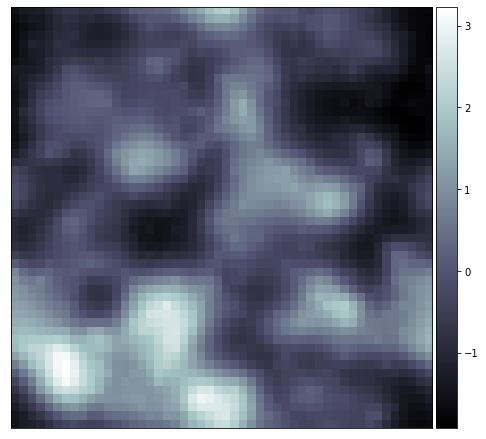

In [53]:
size = 50
mode = "snow_dune"
order = 0.9


if mode == "multi_valley":
    #original multivalley topography
    H ,_,_ = multi_valley(size=size)
elif mode == "order":
    #original order topography
    H = order_distribution(order,size)
    mode = f"order_{order}"
else:
    #topologies from From Popovic et al., 2020
    H = Create_Initial_Topography(res=size, mode=mode, tmax=2, dt=0.1, g=1, sigma_h=1., h=0., snow_dune_radius=1.,Gaussians_per_pixel=0.2, number_of_r_bins=150, window_size=5, snow_dune_height_exponent=1.)


#water not present in initial domain
h = np.zeros((H.shape[0],H.shape[0]))

#draw 3d plot
# draw_3d_CA(H,h,mode,size)

#draw 2d plot
draw_2D_CA(H,mode,size)
